In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_validation = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.set_index('PassengerId', inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [6]:
df.shape

(8693, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [8]:
df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

<AxesSubplot:ylabel='None'>

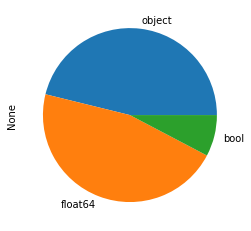

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Convert data types

In [12]:
df["VIP"] = df["VIP"].astype("category")

In [13]:
df["CryoSleep"] = df["CryoSleep"].astype("category")

In [14]:
df["Transported"] = df["Transported"].astype("int64")

# Exploring data

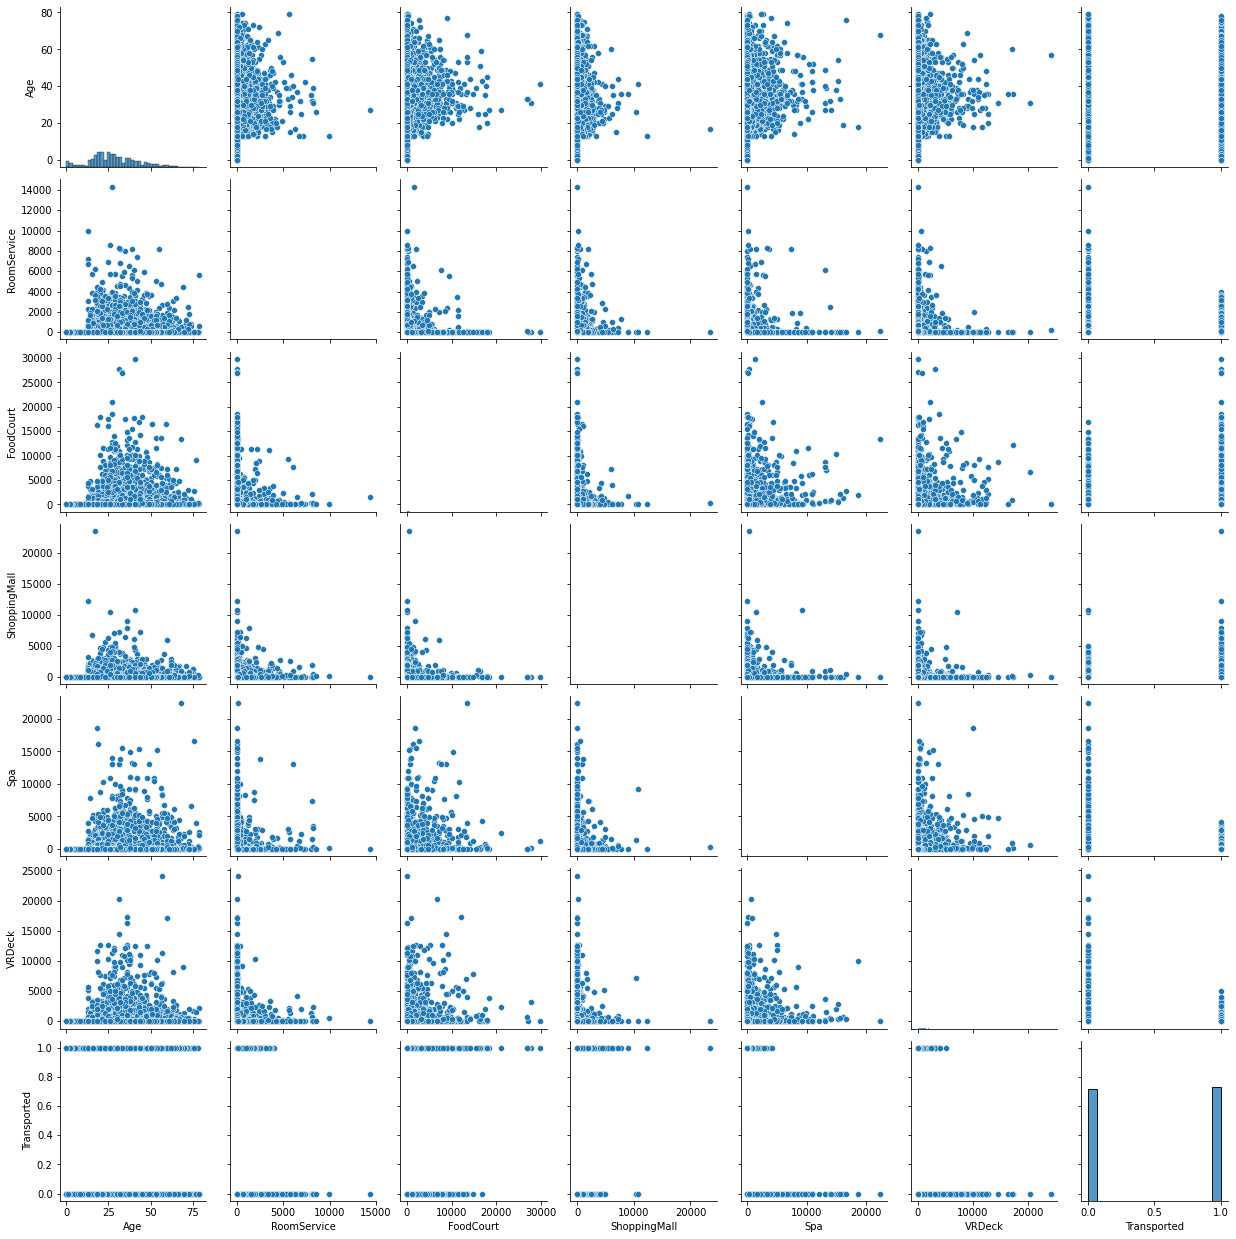

In [15]:
sns.pairplot(df)

## Numeric features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

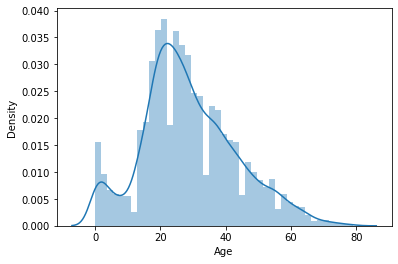

In [16]:
sns.distplot(df['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


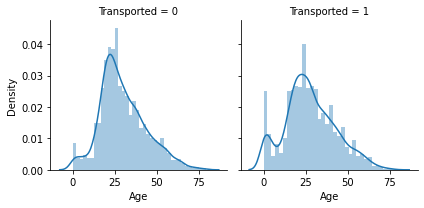

In [17]:
# Explore Age vs Transported
g = sns.FacetGrid(df, col='Transported')
g = g.map(sns.distplot, "Age")

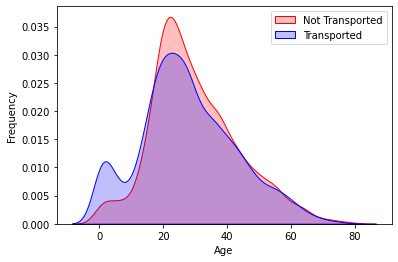

In [18]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Transported"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Transported"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Transported","Transported"])

A relative large part of children is transported.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


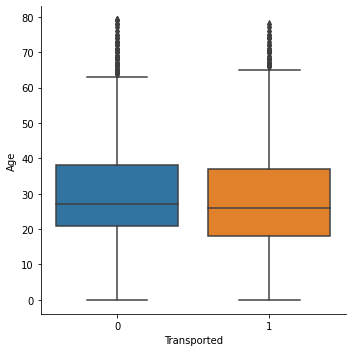

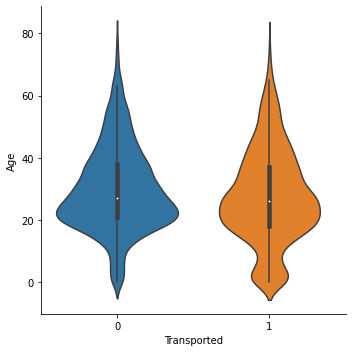

In [19]:
g = sns.factorplot(x="Transported", y = "Age",data = df, kind="box")
g = sns.factorplot(x="Transported", y = "Age",data = df, kind="violin")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


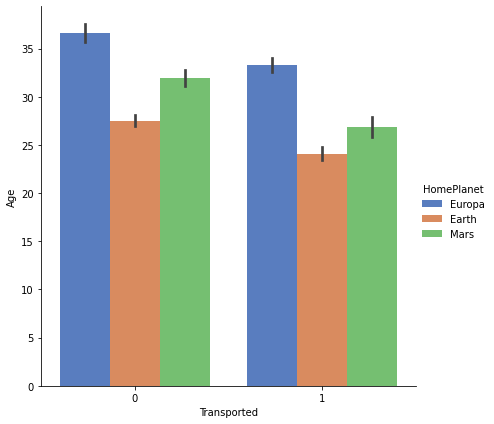

In [20]:
g = sns.catplot(x="Transported", y="Age", hue="HomePlanet", data=df,
                   size=6, kind="bar", palette="muted")
g = g.set_ylabels("Age")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Transported', ylabel='Age'>

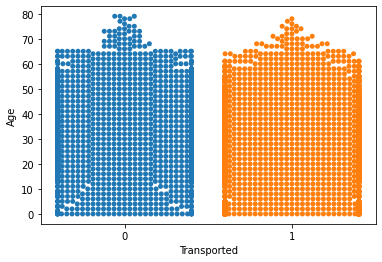

In [21]:
sns.swarmplot('Transported', 'Age', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

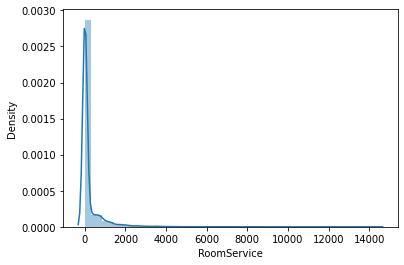

In [22]:
sns.distplot(df['RoomService'])

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

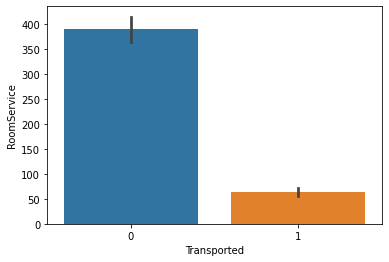

In [23]:
sns.barplot(x='Transported', y='RoomService', data=df)

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

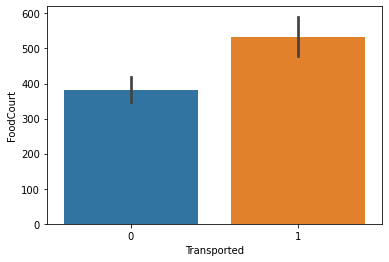

In [24]:
sns.barplot(x='Transported', y='FoodCourt', data=df)

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

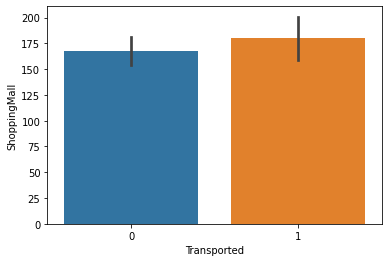

In [25]:
sns.barplot(x='Transported', y='ShoppingMall', data=df)

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

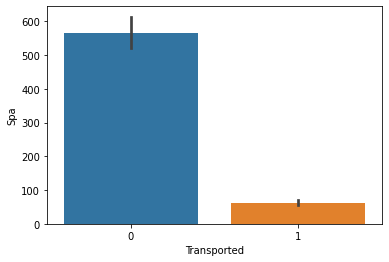

In [26]:
sns.barplot(x='Transported', y='Spa', data=df)

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

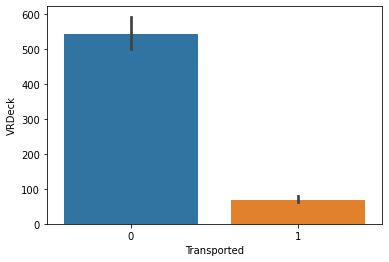

In [27]:
sns.barplot(x='Transported', y='VRDeck', data=df)

## Categorical variables

### Destination

In [28]:
df['Destination'].value_counts(normalize=True)

TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: Destination, dtype: float64

In [29]:
df[['Destination', 'Transported']].value_counts()

Destination    Transported
TRAPPIST-1e    0              3128
               1              2787
55 Cancri e    1              1098
               0               702
PSO J318.5-22  1               401
               0               395
dtype: int64

In [30]:
df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

In [31]:
df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).count().sort_values(by='Transported', ascending=False)

,Destination,Transported
2,TRAPPIST-1e,5915
0,55 Cancri e,1800
1,PSO J318.5-22,796


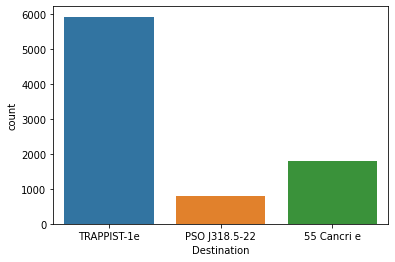

In [32]:
plt.figure()
sns.countplot(x=df['Destination'])
plt.show()

### Home Planet

In [33]:
df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [34]:
df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).count().sort_values(by='HomePlanet', ascending=False)

,HomePlanet,Transported
2,Mars,1759
1,Europa,2131
0,Earth,4602


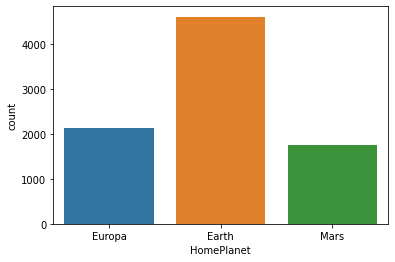

In [35]:
plt.figure()
sns.countplot(x=df['HomePlanet'])
plt.show()

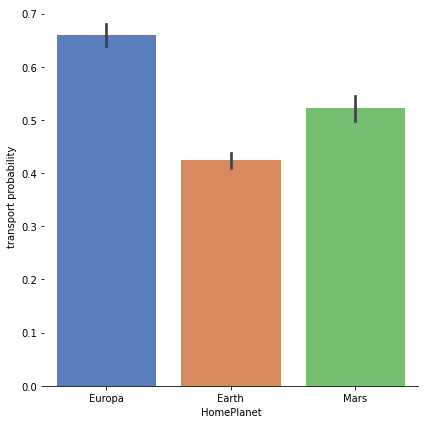

In [36]:
# Explore HomePlanet feature vs Transported
g = sns.catplot(x="HomePlanet",y="Transported",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


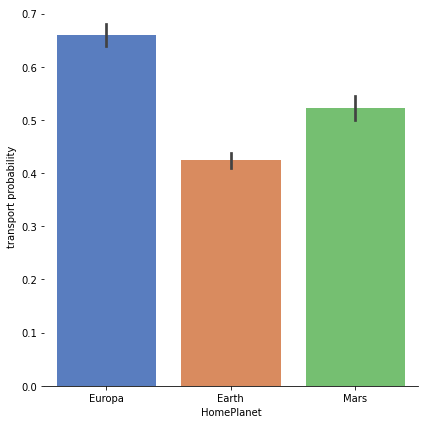

In [37]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="HomePlanet",y="Transported",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

### CryoSleep

In [38]:
df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

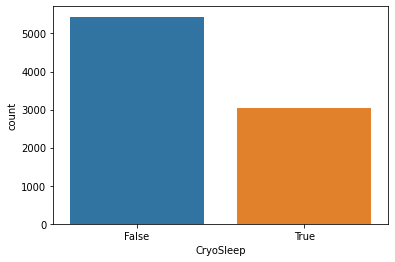

In [39]:
plt.figure()
sns.countplot(x = df['CryoSleep'])
plt.show()

### VIP

In [40]:
df.groupby('VIP')['Transported'].mean()

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

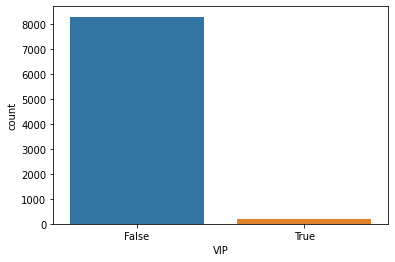

In [41]:
plt.figure()
sns.countplot(x = df['VIP'])
plt.show()

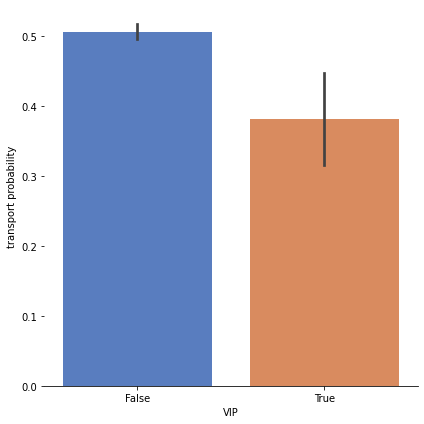

In [42]:
# Explore VIP feature vs Transported
g = sns.catplot(x="VIP",y="Transported",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

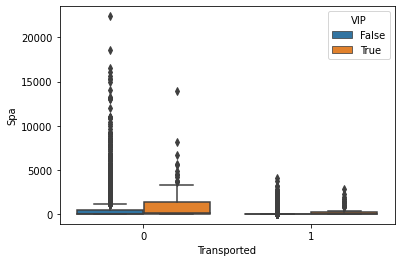

In [43]:
sns.boxplot(x="Transported", y="Spa", hue="VIP", data=df);

<AxesSubplot:>

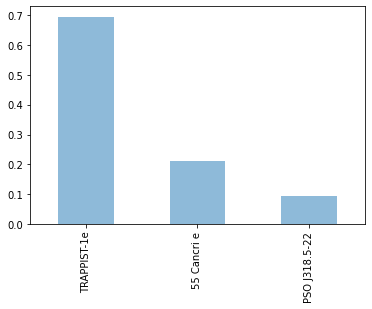

In [44]:
df.Destination.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


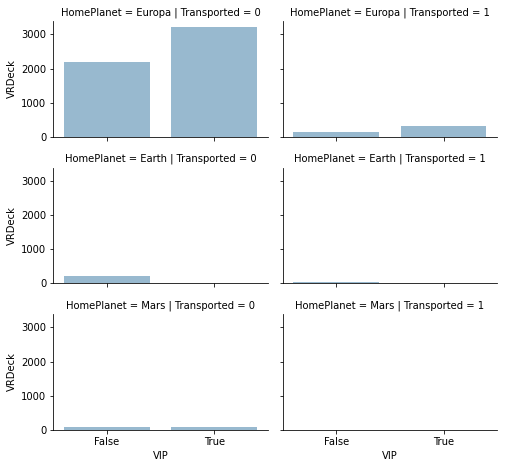

In [45]:
grid = sns.FacetGrid(df, row='HomePlanet', col='Transported', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'VIP', 'VRDeck', alpha=.5, ci=None)
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


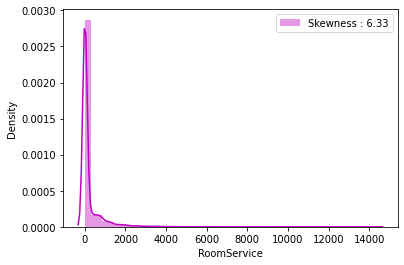

In [46]:
g = sns.distplot(df["RoomService"], color="m", label="Skewness : %.2f"%(df["RoomService"].skew()))
g = g.legend(loc="best")

In [47]:
plt.figure(figsize = (14,8))
#sns.heatmap(df.corr(), linewidths = 0.5, annot = True, fmt = ".2f", cmap = "coolwarm")

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [48]:
df.corr()["Transported"].sort_values(ascending = False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

In [49]:
df.Cabin.str[0].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [50]:
df['RoomServiceSqrt'] = np.sqrt(df['RoomService'].isna())

In [51]:
df.RoomServiceSqrt.describe()

count    8693.000000
mean        0.020828
std         0.142700
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: RoomServiceSqrt, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RoomServiceSqrt', ylabel='Density'>

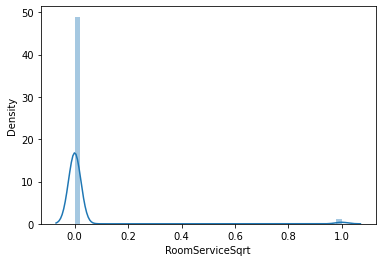

In [52]:
sns.distplot(df.RoomServiceSqrt)

# Feature Engineering

In [53]:
# IDEAS
# Destination

# Total money spend
# Family Names
# Cabin letter, first and last

In [54]:
def processData(df):
    '''
    df['Sex'] = df['Sex'].apply(lambda r: 0 if r == 'male' else 1).astype('int')
    
    df["FamilySize"] = df['SibSp'] + df['Parch']
    
    # Create new feature of family size
    df['Single'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['SmallF'] = df['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    df['MedF'] = df['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    df['LargeF'] = df['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    
    df['HasBoardedSiblingsOrSpouses'] = df['SibSp'] >= 1
    df['HasBoardedParentsChildren'] = df['Parch'] >= 1

    
    df['isSenior'] = df['Age'] > 65
    
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna("Unknown")
    #df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
    #df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
    #df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')
    
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme', 'Mrs'], 'Miss')
    
    df = df.set_index('PassengerId', drop=False)
    
    df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
    '''
    
    df['isChild'] = df['Age'] < 18
    
    return df

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

class general_cleaner(BaseEstimator, TransformerMixin):
    '''
    This class applies what we know from the documetation.
    It cleans some known missing values
    If flags the missing values

    This process is supposed to happen as first step of any pipeline
    '''
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #LotFrontage
        X.loc[X.LotFrontage.isnull(), 'LotFrontage'] = 0
        #Alley
        X.loc[X.Alley.isnull(), 'Alley'] = "NoAlley"
        #MSSubClass
        X['MSSubClass'] = X['MSSubClass'].astype(str)
        #MissingBasement
        fil = ((X.BsmtQual.isnull()) & (X.BsmtCond.isnull()) & (X.BsmtExposure.isnull()) &
              (X.BsmtFinType1.isnull()) & (X.BsmtFinType2.isnull()))
        fil1 = ((X.BsmtQual.notnull()) | (X.BsmtCond.notnull()) | (X.BsmtExposure.notnull()) |
              (X.BsmtFinType1.notnull()) | (X.BsmtFinType2.notnull()))
        X.loc[fil1, 'MisBsm'] = 0
        X.loc[fil, 'MisBsm'] = 1 # made explicit for safety
        #BsmtQual
        X.loc[fil, 'BsmtQual'] = "NoBsmt" #missing basement
        #BsmtCond
        X.loc[fil, 'BsmtCond'] = "NoBsmt" #missing basement
        #BsmtExposure
        X.loc[fil, 'BsmtExposure'] = "NoBsmt" #missing basement
        #BsmtFinType1
        X.loc[fil, 'BsmtFinType1'] = "NoBsmt" #missing basement
        #BsmtFinType2
        X.loc[fil, 'BsmtFinType2'] = "NoBsmt" #missing basement
        #BsmtFinSF1
        X.loc[fil, 'BsmtFinSF1'] = 0 # No bsmt
        #BsmtFinSF2
        X.loc[fil, 'BsmtFinSF2'] = 0 # No bsmt
        #BsmtUnfSF
        X.loc[fil, 'BsmtUnfSF'] = 0 # No bsmt
        #TotalBsmtSF
        X.loc[fil, 'TotalBsmtSF'] = 0 # No bsmt
        #BsmtFullBath
        X.loc[fil, 'BsmtFullBath'] = 0 # No bsmt
        #BsmtHalfBath
        X.loc[fil, 'BsmtHalfBath'] = 0 # No bsmt
        #FireplaceQu
        X.loc[(X.Fireplaces == 0) & (X.FireplaceQu.isnull()), 'FireplaceQu'] = "NoFire" #missing
        #MisGarage
        fil = ((X.GarageYrBlt.isnull()) & (X.GarageType.isnull()) & (X.GarageFinish.isnull()) &
              (X.GarageQual.isnull()) & (X.GarageCond.isnull()))
        fil1 = ((X.GarageYrBlt.notnull()) | (X.GarageType.notnull()) | (X.GarageFinish.notnull()) |
              (X.GarageQual.notnull()) | (X.GarageCond.notnull()))
        X.loc[fil1, 'MisGarage'] = 0
        X.loc[fil, 'MisGarage'] = 1
        #GarageYrBlt
        X.loc[X.GarageYrBlt > 2200, 'GarageYrBlt'] = 2007 #correct mistake
        X.loc[fil, 'GarageYrBlt'] = 0
        #GarageType
        X.loc[fil, 'GarageType'] = "NoGrg" #missing garage
        #GarageFinish
        X.loc[fil, 'GarageFinish'] = "NoGrg" #missing
        #GarageQual
        X.loc[fil, 'GarageQual'] = "NoGrg" #missing
        #GarageCond
        X.loc[fil, 'GarageCond'] = "NoGrg" #missing
        #Fence
        X.loc[X.Fence.isnull(), 'Fence'] = "NoFence" #missing fence
        #Pool
        fil = ((X.PoolArea == 0) & (X.PoolQC.isnull()))
        X.loc[fil, 'PoolQC'] = 'NoPool' 
        
        del X['Id']
        del X['MiscFeature']
        del X['MSSubClass']
        del X['Neighborhood']  # this should be useful
        del X['Condition1']
        del X['Condition2']
        del X['ExterCond']  # maybe ordinal
        del X['Exterior1st']
        del X['Exterior2nd']
        del X['Functional']
        del X['Heating']
        del X['PoolQC']
        del X['RoofMatl']
        del X['RoofStyle']
        del X['SaleCondition']
        del X['SaleType']
        del X['Utilities']
        del X['BsmtCond']
        del X['Electrical']
        del X['Foundation']
        del X['Street']
        del X['Fence']
        del X['LandSlope']
        
        return X

In [56]:
df = processData(df)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df.Transported, test_size=0.25, random_state=90)

In [58]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,RoomServiceSqrt,isChild
PassengerId,,,,,,,,,,,,,,,
8135_01,Europa,True,C/267/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Navior Coudered,1,0.0,False
0138_01,Earth,True,G/18/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Fayene Gambs,1,0.0,True
5154_01,Mars,False,E/321/P,TRAPPIST-1e,34.0,True,38.0,0.0,606.0,0.0,404.0,Sunch Buche,0,0.0,False
0992_01,Europa,False,D/35/S,TRAPPIST-1e,49.0,False,31.0,2727.0,0.0,184.0,135.0,Zino Kiling,1,0.0,False
5408_02,Mars,False,D/174/P,TRAPPIST-1e,16.0,False,2116.0,0.0,350.0,0.0,901.0,Felios Gene,0,0.0,True


In [59]:
X_train = processData(X_train)
X_test = processData(X_test)
df_validation = processData(df_validation)

<AxesSubplot:>

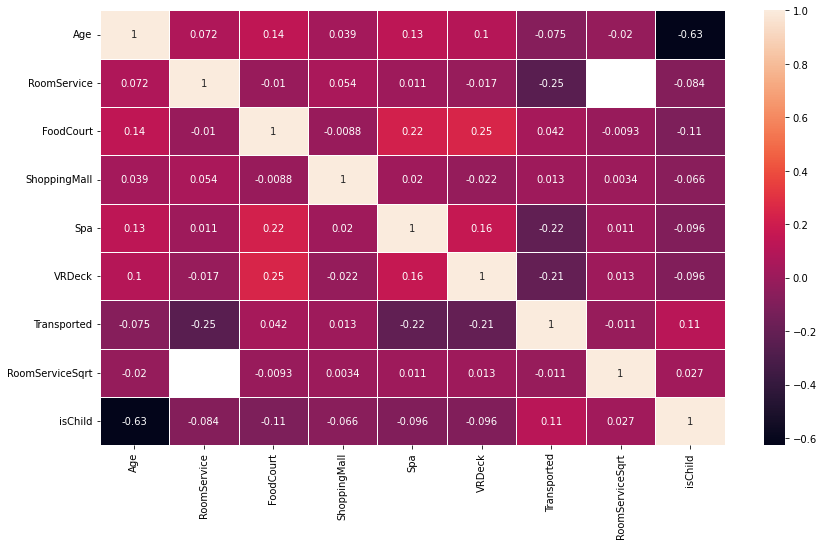

In [60]:
plt.figure(figsize = (14,8))
sns.heatmap(X_train.corr(), linewidths = 0.5, annot = True)

In [61]:
X_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomServiceSqrt,isChild
Age,1.000000,0.072346,0.138615,0.039487,0.132974,0.101787,-0.075335,-0.020462,-0.627018
RoomService,0.072346,1.000000,-0.010138,0.053994,0.010961,-0.016699,-0.245825,NaN,-0.083809
FoodCourt,0.138615,-0.010138,1.000000,-0.008829,0.224297,0.247768,0.041902,-0.009320,-0.111437
ShoppingMall,0.039487,0.053994,-0.008829,1.000000,0.019727,-0.021811,0.013410,0.003404,-0.065528
Spa,0.132974,0.010961,0.224297,0.019727,1.000000,0.163155,-0.218046,0.010816,-0.096374
VRDeck,0.101787,-0.016699,0.247768,-0.021811,0.163155,1.000000,-0.205466,0.013367,-0.096031
Transported,-0.075335,-0.245825,0.041902,0.013410,-0.218046,-0.205466,1.000000,-0.011367,0.111954
RoomServiceSqrt,-0.020462,NaN,-0.009320,0.003404,0.010816,0.013367,-0.011367,1.000000,0.026957
isChild,-0.627018,-0.083809,-0.111437,-0.065528,-0.096374,-0.096031,0.111954,0.026957,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


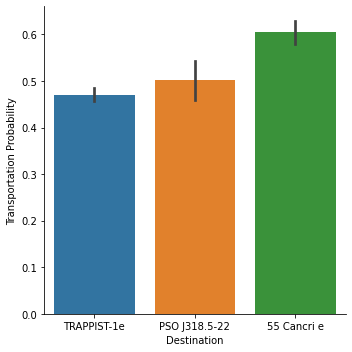

In [62]:
g = sns.factorplot(y="Transported",x="Destination",data=X_train,kind="bar")
g = g.set_ylabels("Transportation Probability")

# Feature Selection

In [63]:
features = ['Age', 'RoomService', 'Spa', 'FoodCourt', 'VRDeck', 'isChild', 'VIP', 'CryoSleep', 'Destination']

# Check different models

In [64]:
y_train = X_train.pop('Transported')

In [65]:
X_train[features]

,Age,RoomService,Spa,FoodCourt,VRDeck,isChild,VIP,CryoSleep,Destination
PassengerId,,,,,,,,,
8135_01,22.0,0.0,0.0,0.0,0.0,False,False,True,TRAPPIST-1e
0138_01,13.0,0.0,0.0,0.0,0.0,True,False,True,TRAPPIST-1e
5154_01,34.0,38.0,0.0,0.0,404.0,False,True,False,TRAPPIST-1e
0992_01,49.0,31.0,184.0,2727.0,135.0,False,False,False,TRAPPIST-1e
5408_02,16.0,2116.0,0.0,0.0,901.0,True,False,False,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...
5223_03,8.0,0.0,0.0,0.0,0.0,True,False,True,TRAPPIST-1e
7199_01,54.0,1.0,NaN,0.0,1.0,False,False,False,TRAPPIST-1e
6092_03,1.0,0.0,0.0,0.0,0.0,True,False,False,TRAPPIST-1e


In [66]:
X_train[features].describe()

,Age,RoomService,Spa,FoodCourt,VRDeck
count,6376.000000,6385.000000,6369.000000,6384.000000,6380.000000
mean,28.905270,226.431637,307.363479,461.945019,315.998589
std,14.445423,672.719330,1128.718219,1625.497764,1191.841073
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,52.000000,63.000000,81.000000,52.000000
max,79.000000,14327.000000,22408.000000,29813.000000,24133.000000


# Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE

categorical_features = X_train[features].select_dtypes(include=['object']).columns
numeric_features = X_train[features].select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    #,('skb', SelectKBest(f_classif))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    #,('skb', SelectKBest(chi2))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

In [68]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    LogisticRegression()
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(X_train[features], y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    

KNeighborsClassifier(n_neighbors=3)
model score: 0.754
SVC(C=0.025, probability=True)
model score: 0.743
NuSVC(probability=True)
model score: 0.763
DecisionTreeClassifier()
model score: 0.737
RandomForestClassifier()
model score: 0.768
AdaBoostClassifier()
model score: 0.770
GradientBoostingClassifier()
model score: 0.782
[08:34:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.769
LogisticRegression()
model score: 0.756


# Grid searching best model

In [69]:
# Random Forest
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)),
                      ('classifier', RandomForestClassifier())])

In [70]:
# Number of trees in random forest
n_estimators = [150,250,350,500]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [4,5,6,7,8]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
param_grid = {
                 "preprocessor__num__imputer__strategy": ["median"],
                 #'preprocessor__num__skb__k' : [5,7,9,11,13],
                 "preprocessor__cat__imputer__strategy": ["constant"],
                 #'preprocessor__cat__skb__k' : [5,7,9,11,13],
                  'classifier__n_estimators': n_estimators,
                 'classifier__max_features': max_features,
                 #'classifier__max_depth': max_depth,
                 #'classifier__min_samples_split': min_samples_split,
                 #'classifier__min_samples_leaf': min_samples_leaf,
                 'classifier__criterion': ['gini', 'entropy']
             }

In [71]:
forest_grid_search = RandomizedSearchCV(forest_pipeline, param_grid, cv=5, n_iter=10, verbose=1)

# fine-tune the hyperparameters
forest_grid_search.fit(X_train[features], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'Spa', 'FoodCourt', 'VRDeck', 'isChild', 'VIP',
       'CryoSleep'],
      dtype='object')),
                                                                            

In [72]:
from sklearn import set_config

set_config(display='diagram')
forest_grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'Spa', 'FoodCourt', 'VRDeck', 'isChild', 'VIP',
       'CryoSleep'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imput...
                                              RFE(estimator=DecisionTreeClassifier(),
                                                  n_features_to_select=7)),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__n_estimators': [150, 250,
                                                                     350, 500],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']},
                   verbose=1)

In [73]:
print("Tuned Hyperparameters :(best parameters) ",forest_grid_search.best_params_)
print("Best score :",forest_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 500, 'classifier__max_features': 'sqrt', 'classifier__criterion': 'gini'}
Best score : 0.7781895484229409


In [74]:
final_model_forest = forest_grid_search.best_estimator_

In [75]:
final_model_forest.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

OneHotEncoder(handle_unknown='ignore')

In [76]:
final_model_forest.named_steps['classifier'].feature_importances_

array([0.16052951, 0.18889012, 0.17359298, 0.15309511, 0.16379248,
       0.14255548, 0.01754432])

In [77]:
final_model_forest.score(X_test.loc[:, features], y_test)

0.7718491260349586

In [78]:
preds = final_model_forest.predict(X_test[features])

In [79]:
print(accuracy_score(y_test,preds))
print(recall_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.7718491260349586
0.8001808318264014
[[793 275]
 [221 885]]


In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model_forest, X_test[features], y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.01


<AxesSubplot:>

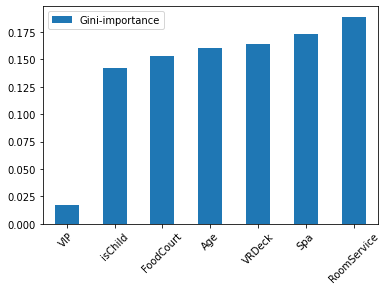

In [81]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train[features].columns, final_model_forest.named_steps['classifier'].feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

# Predictions

In [82]:
df_validation

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,isChild
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,False
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False


In [83]:
y_pred = final_model_forest.predict(df_validation[features])
len(df_validation)
len(y_pred)

4277

In [84]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

# Create CSV

In [85]:
my_submission = pd.DataFrame({'PassengerId': df_validation.PassengerId, 'Transported': y_pred.astype('bool')})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [86]:
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
